In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.concat(pd.read_excel('Excel_updatedCountySheet.xlsx', sheet_name=None), ignore_index=True)

In [4]:
df.count()

Unnamed: 0          41300
TEACHER_SALARY      41296
YEARS_TAUGHT        41177
LASTNAME            41299
FULL_TIME           41300
CLASSES_TAUGHT      41264
JOBCODE1            41300
HIGHESTCOMPLETED    41224
COUNTY_CODE         41300
dtype: int64

In [5]:
df.describe()

,Unnamed: 0,TEACHER_SALARY,YEARS_TAUGHT,FULL_TIME,CLASSES_TAUGHT,JOBCODE1,COUNTY_CODE
count,41300.000000,41296.000000,41177.000000,41300.0,41264.000000,41300.000000,41300.000000
mean,69277.902010,73404.052838,12.729606,1.0,4.127545,1380.288668,19.301404
std,40840.174574,16993.950639,8.443246,0.0,2.571922,503.627308,11.673301
min,6.000000,18500.000000,0.000000,1.0,1.000000,1001.000000,1.000000
25%,34195.750000,59012.250000,6.000000,1.0,1.000000,1001.000000,7.000000
50%,68123.000000,70700.000000,12.000000,1.0,5.000000,1103.000000,21.000000
75%,104452.250000,85928.500000,18.000000,1.0,5.000000,1901.000000,29.000000
max,140908.000000,145798.000000,50.000000,1.0,40.000000,2391.000000,41.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41300 entries, 0 to 41299
Data columns (total 9 columns):
Unnamed: 0          41300 non-null int64
TEACHER_SALARY      41296 non-null float64
YEARS_TAUGHT        41177 non-null float64
LASTNAME            41299 non-null object
FULL_TIME           41300 non-null int64
CLASSES_TAUGHT      41264 non-null float64
JOBCODE1            41300 non-null int64
HIGHESTCOMPLETED    41224 non-null object
COUNTY_CODE         41300 non-null int64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.5+ MB


In [7]:
df.head()

,Unnamed: 0,TEACHER_SALARY,YEARS_TAUGHT,LASTNAME,FULL_TIME,CLASSES_TAUGHT,JOBCODE1,HIGHESTCOMPLETED,COUNTY_CODE
0,6,55996.0,NaN,Gibbons,1,1.0,1001,NaN,1
1,12,86539.0,19.0,Adair,1,5.0,1001,Masters,1
2,13,64357.0,9.0,Roberts,1,5.0,1001,Bachelors,1
3,14,90308.0,19.0,Horner,1,5.0,1001,Doctoral,1
4,15,67401.0,12.0,Broomhead,1,5.0,1106,Bachelors,1


In [8]:
# The dataset only stores COUNTY_CODE, this dictionary will be useful to plot categorical Data
countyNameCode = {
    1: 'Atlantic',
    3: 'Bergen',
    5: 'Burlington',
    7: 'Camden',
    9: 'Cape May',
    11: 'Cumberland',
    13: 'Essex',
    15: 'Gloucester',
    17: 'Hudson',
    19: 'Hunterdon',
    21: 'Mercer',
    23: 'Middlesex',
    25: 'Monmouth',
    27: 'Morris', 
    29: 'Ocean', 
    31: 'Passaic', 
    33: 'Salem', 
    35: 'Somerset', 
    37: 'Sussex',
    39: 'Union',
    41: 'Warren'
}

In [9]:
count = 0
# Change COUNTY_CODE TO COUNTY_NAME using the above dictionary
for code in df['COUNTY_CODE']:
    df['COUNTY_CODE'][count] = countyNameCode[code]
    count = count + 1

c:\users\abastola\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
c:\users\abastola\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


(array([1717., 4230., 2374., 2157.,    0.,  463.,  843., 3701., 1338.,
           0., 2776.,  683., 1729., 3161.,    0., 3323., 2459., 2113.,
        2188.,    0.,  371., 1710.,  713., 2685.,  566.]),
 array([ 0. ,  0.8,  1.6,  2.4,  3.2,  4. ,  4.8,  5.6,  6.4,  7.2,  8. ,
         8.8,  9.6, 10.4, 11.2, 12. , 12.8, 13.6, 14.4, 15.2, 16. , 16.8,
        17.6, 18.4, 19.2, 20. ]),
 <a list of 25 Patch objects>)

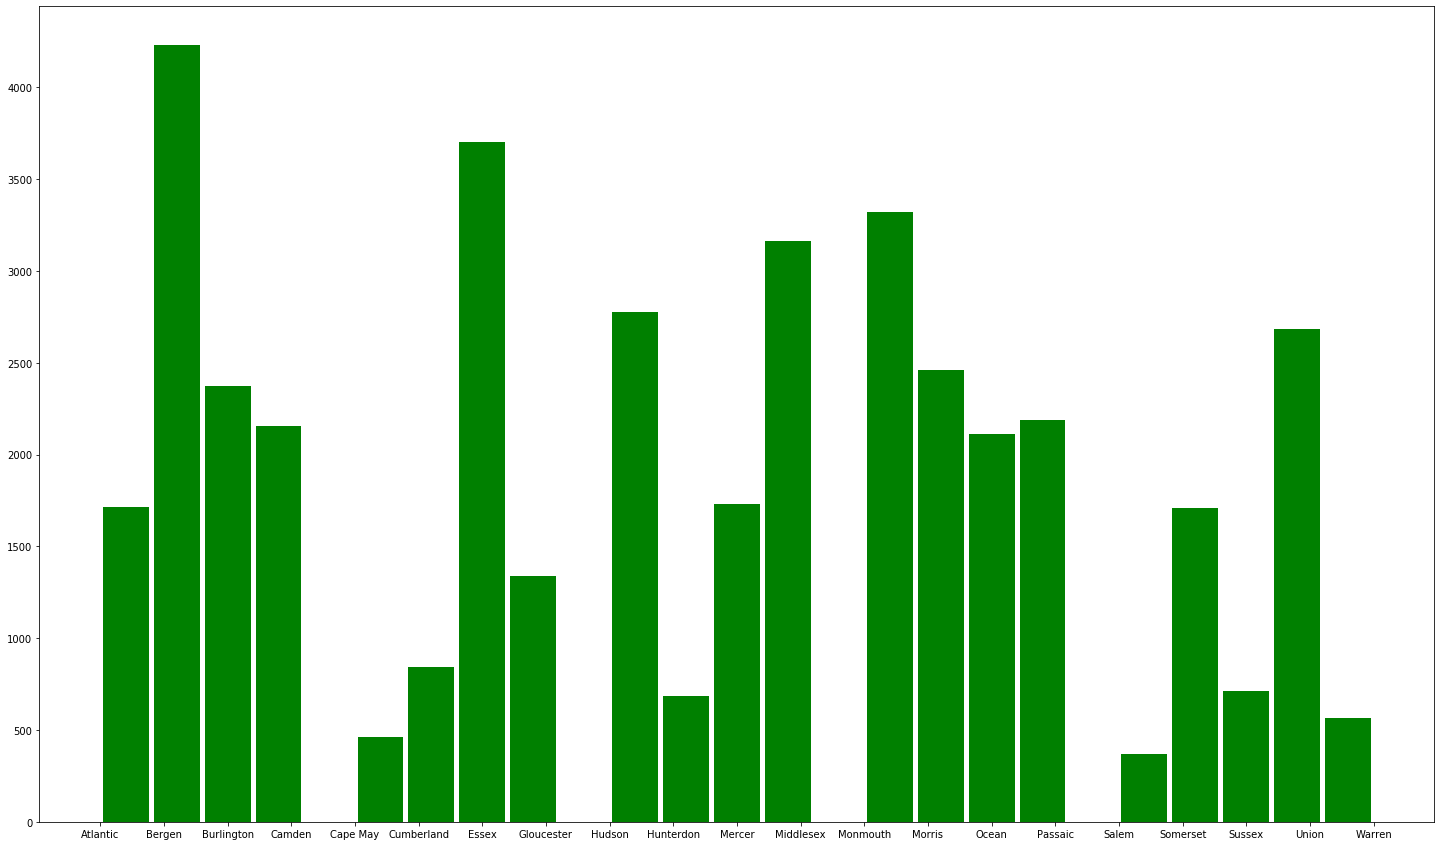

In [10]:
plt.figure(figsize=(25,15))
plt.hist(df['COUNTY_CODE'], bins= 25, rwidth=0.9, color="green")

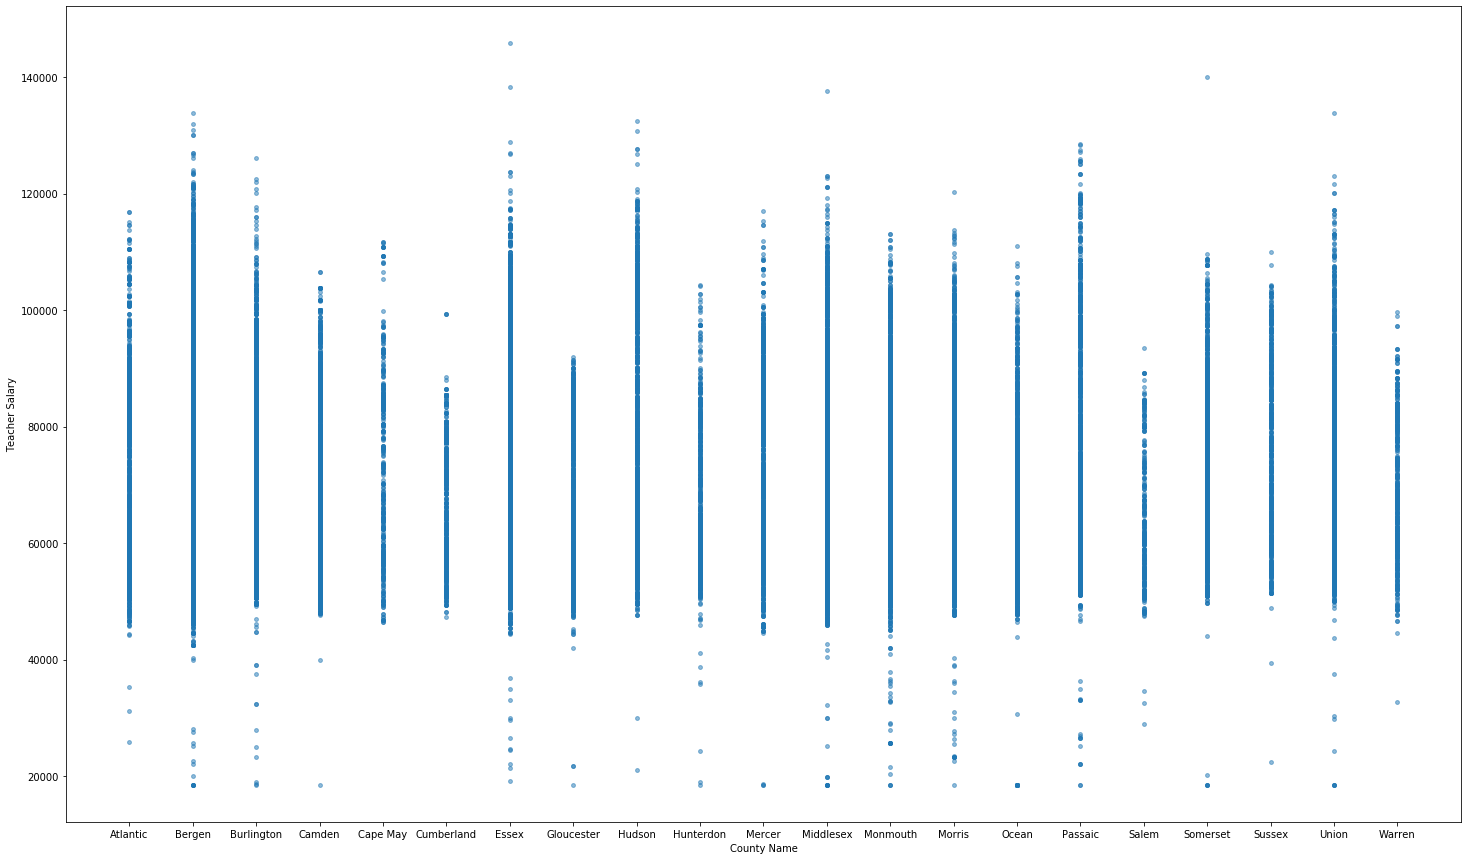

In [11]:
plt.figure(figsize=(25,15))

# Scatter Plot for Salaries
plt.scatter(df['COUNTY_CODE'], df['TEACHER_SALARY'], s=15, alpha=0.5)
plt.xlabel("County Name")
plt.ylabel("Teacher Salary")
plt.show()

In [25]:
# Stores county_name as key, and list of salries as value
salaryCounty = dict()
for i in range(len(df)):
    if df['COUNTY_CODE'][i] in salaryCounty:
        salaryCounty[df['COUNTY_CODE'][i]].append(df['TEACHER_SALARY'][i])
    else:
        salaryCounty[df['COUNTY_CODE'][i]] = [df['TEACHER_SALARY'][i]]
#     print(df['TEACHER_SALARY'][i], df['COUNTY_CODE'][i])

In [36]:
import math

In [40]:
for key, value in salaryCounty.items():
    sum = 0
    indexNan = [ i for i in range(len(value)) if math.isnan(value[i]) else sum = sum + value[i]]
    print(indexNan)
#     print(key, sum(value))
    print()
    print()

SyntaxError: invalid syntax (<ipython-input-40-acb082d4a58f>, line 3)

In [13]:
# change the value(list of salaries) to average salary

for key, value in salaryCounty.items():
    salaryCounty[key] = sum(value) / len(value)

In [14]:
print(salaryCounty)

{'Atlantic': 72677.09027373325, 'Bergen': 77958.74184397163, 'Burlington': 73142.60783487784, 'Camden': 70417.06629578117, 'Cape May': 73035.17710583154, 'Cumberland': 67919.32384341636, 'Essex': nan, 'Gloucester': 67830.98056801196, 'Hudson': 77518.78422190202, 'Hunterdon': 68856.4289897511, 'Mercer': 73952.41064198958, 'Middlesex': nan, 'Monmouth': 72504.99337947638, 'Morris': 72415.95485969906, 'Ocean': 66243.52531945102, 'Passaic': 74183.19149908592, 'Salem': 63487.943396226416, 'Somerset': 72656.63450292397, 'Sussex': 75557.29733520337, 'Union': 74690.63351955307, 'Warren': 70066.5}


In [21]:
# Get the list of counties and their avgSalries
county = list(salaryCounty.keys())
avgSalary = list(salaryCounty.values())

In [24]:
for i in range(len(county)):
    print(county[i] + " --> " + str(avgSalary[i]))

Atlantic --> 72677.09027373325
Bergen --> 77958.74184397163
Burlington --> 73142.60783487784
Camden --> 70417.06629578117
Cape May --> 73035.17710583154
Cumberland --> 67919.32384341636
Essex --> nan
Gloucester --> 67830.98056801196
Hudson --> 77518.78422190202
Hunterdon --> 68856.4289897511
Mercer --> 73952.41064198958
Middlesex --> nan
Monmouth --> 72504.99337947638
Morris --> 72415.95485969906
Ocean --> 66243.52531945102
Passaic --> 74183.19149908592
Salem --> 63487.943396226416
Somerset --> 72656.63450292397
Sussex --> 75557.29733520337
Union --> 74690.63351955307
Warren --> 70066.5


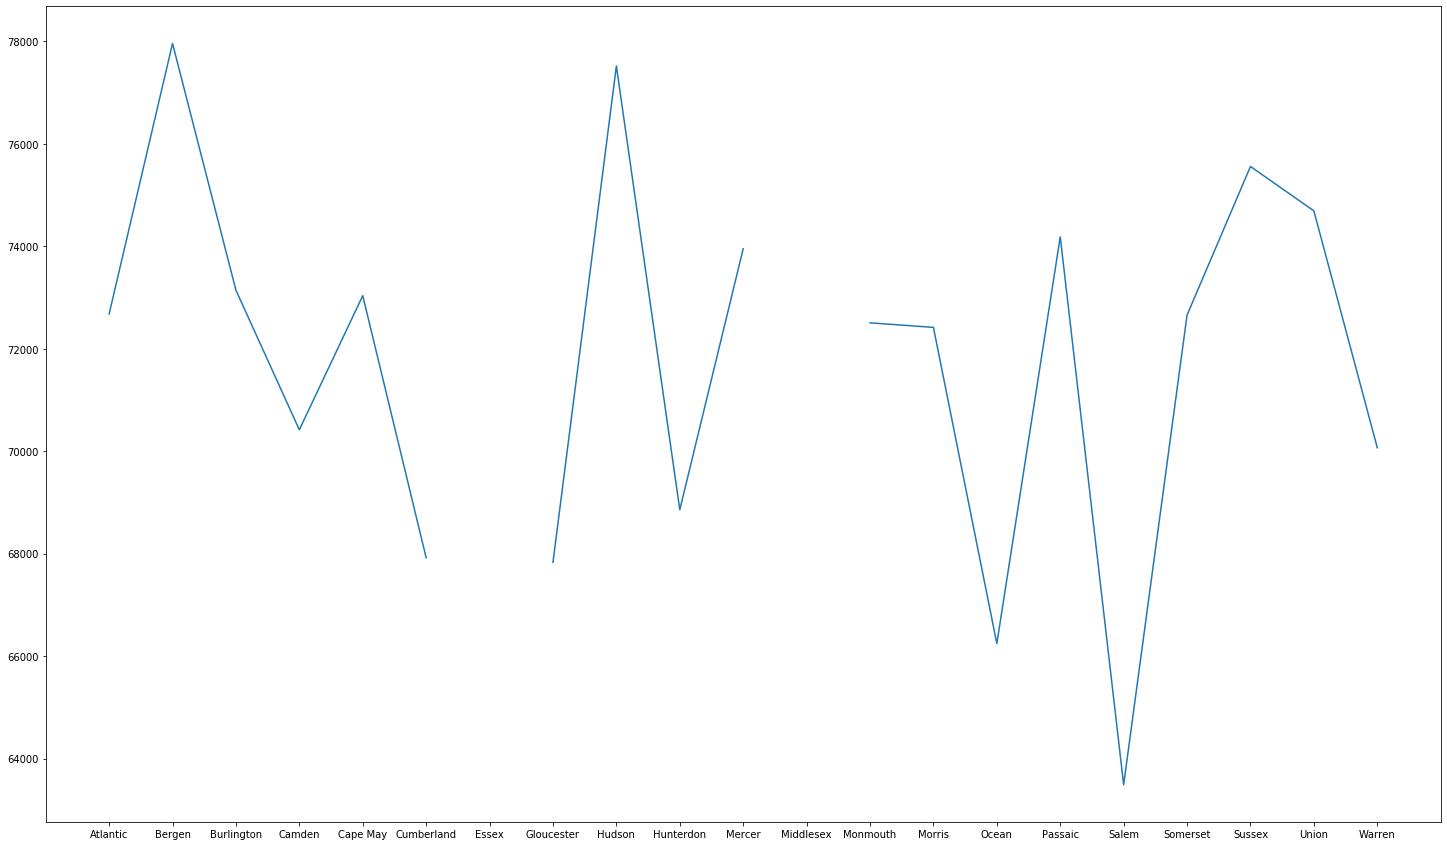

In [16]:
plt.figure(figsize=(25,15))
plt.plot(county, avgSalary)

In [17]:
import seaborn as sns

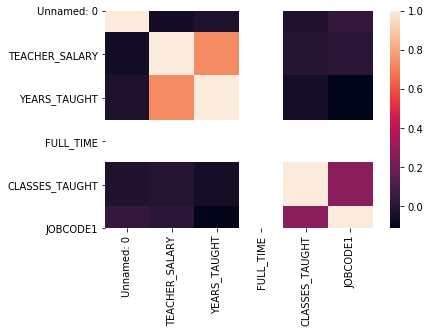

In [18]:
sns.heatmap(df.corr())